# Ridho Chaerullah 202231122

## K-Means

In [9]:
import numpy as np # untuk komputasi numerik seperti operasi array dan matriks.
import pandas as pd # Digunakan untuk manipulasi dan analisis data, seperti membaca file CSV.
from sklearn.preprocessing import StandardScaler # Digunakan untuk menstandarkan data agar memiliki mean 0 dan standar deviasi 1.
from sklearn.cluster import KMeans # Algoritma clustering berbasis centroid yang digunakan untuk mempartisi data ke dalam beberapa cluster.
import matplotlib.pyplot as plt # Digunakan untuk visualisasi data

In [10]:
# Membaca dataset dari file sales.csv dan menyimpannya ke dalam variabel df.
# Dataset ini diasumsikan berisi data penjualan dari beberapa minggu.

df = pd.read_csv("sales.csv")
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [11]:
# Mengambil kolom ke-2 hingga ke-53 dari dataset (iloc[:, 1:53]) untuk digunakan sebagai fitur clustering.

X = df.iloc[:, 1:53]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [12]:
# StandardScaler: Digunakan untuk menormalkan data sehingga setiap fitur memiliki distribusi standar (mean = 0, std = 1).
# Data yang distandarkan disimpan dalam scaled_X.

scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))
scaled_X.columns = X.columns

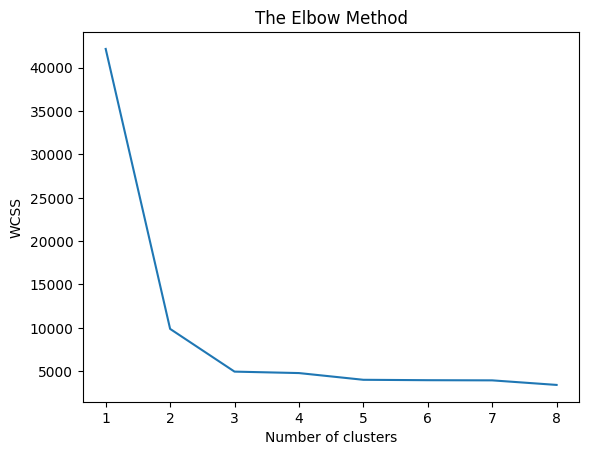

In [18]:
# WCSS (Within-Cluster Sum of Squares): Total jarak kuadrat antara titik data dan centroid cluster.
# Metode Elbow membantu menentukan jumlah cluster optimal dengan mencari "tikungan" pada grafik WCSS.
# Grafik menunjukkan hubungan antara jumlah cluster dan WCSS.

wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Membuat model K-Means dengan 3 cluster.
# kmeans.fit_predict memberikan label cluster untuk setiap data.

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_X)

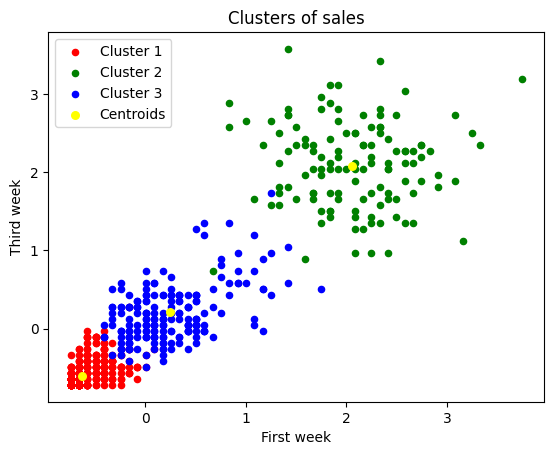

In [15]:
plt.scatter(scaled_X[y_kmeans == 0]['W0'], scaled_X[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_X[y_kmeans == 1]['W0'], scaled_X[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

# Scatter plot digunakan untuk memvisualisasikan data berdasarkan dua fitur: W0 (minggu pertama) dan W2 (minggu ketiga).
# Centroid (titik pusat cluster) divisualisasikan sebagai titik kuning.

In [16]:
#evaluasi model
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(scaled_X, labels)

# Davies-Bouldin Score: Metrik untuk mengevaluasi kualitas clustering. Nilai lebih rendah menunjukkan cluster yang lebih baik.
# Interpretasi: Mengukur rasio jarak intra-cluster terhadap jarak inter-cluster.
# Digunakan untuk memastikan bahwa cluster yang dihasilkan baik dan terpisah dengan jelas.

0.6353330235798741